In [19]:
import numpy as np
import matplotlib.pyplot as plt
from simple_mc_funcs import*
import math

Color blind friendly colors.

In [20]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','olive']

Generating random uniform distributions of different gamma-ray event sizes. 

In [21]:
size_of_sample=10
number_of_MC=100000
uniforms = []
counter=0
while counter<number_of_MC:
    uniforms.append(np.random.uniform(0,1,size_of_sample))
    counter+=1

Generating power-laws and exponentially decaying distributions.

In [22]:
gamma=2.4
E_max=40
pow_dists = []
exp_dists = []
for dists in uniforms:
    powlawdist = pow_dists.append(powlaw_inversecdf(dists,
                                                    E_0=10.,
                                                    gamma=gamma,
                                                    E_max=E_max))
    exp_dists.append(exp_inversecdf(dists))

Number density of CsI.

In [23]:
n_CsI=1.05e22

Empty arrays to store sampled mean-free paths from distributions.

In [24]:
lambda_measured = []
for i in pow_dists:
    lambda_measured.append(np.zeros(len(i)))

Sampling a traversed path for every energy using a large sized traversed path sample.

In [25]:
u = np.random.uniform(0,1,1000000)
path_samples = exp_inversecdf(u)

for E_dist,lambda_meas_dist in zip(pow_dists,lambda_measured):
    for i,energy in enumerate(E_dist):
        x = np.random.choice(path_samples)
        while x==0.:
            x = np.random.choice(path_samples)
        lambda_meas_dist[i] = x

Binning events in log energy and calculating mean traversed path per bin as well as the uncertainty in the mean.

In [26]:
histograms = []
binned_traversedpath = []
binned_traversedpatherror = []
traversedpath_rms_perbin = []

for Edist, lambdadist in zip(pow_dists,lambda_measured):
    binneddists = histogramlogspacing(Edist,lambdadist,bin_number=2)
    histograms.append(binneddists[0])
    binned_traversedpath.append(binneddists[1])
    binned_traversedpatherror.append(binneddists[2])
    traversedpath_rms_perbin.append(binneddists[3])

Plotting distribution of average traversed path per energy bin for all energy bins.

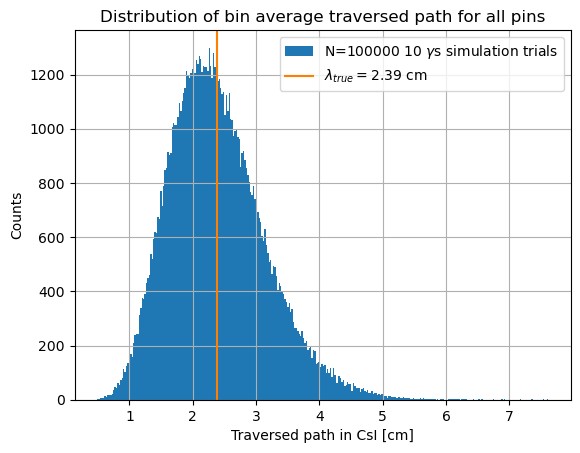

In [27]:
lambdas=np.concatenate(binned_traversedpath)
plt.hist(
    lambdas,
    bins=int(np.floor(np.sqrt(len(lambdas)))),
    label=r'N={} 10 $\gamma$s simulation trials'.format(number_of_MC)
    )
plt.xlabel('Traversed path in CsI [cm]')
plt.ylabel('Counts')
plt.grid()
plt.title('Distribution of bin average traversed path for all pins')
plt.axvline(x=2.39,color=colors[1],label=r'$\lambda_{true}=$2.39 cm')
plt.legend();

Plotting distribution of errors.

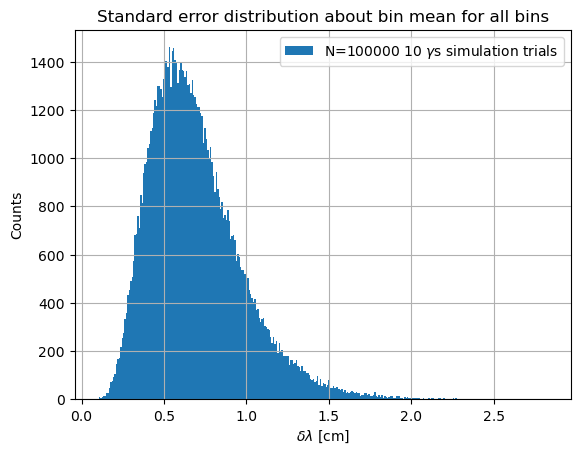

In [28]:
# The next line of code concatenates all errors into a single array.
lambda_errors=np.concatenate(binned_traversedpatherror)
# lambda_errors=lambda_errors[lambda_errors!=0]
plt.hist(
    lambda_errors,
    bins=int(np.floor(np.sqrt(len(lambda_errors)))),
    label=r'N={} 10 $\gamma$s simulation trials'.format(number_of_MC)
    )
plt.xlabel(r'$ \delta \lambda$ [cm]')
plt.ylabel('Counts')
plt.title('Standard error distribution about bin mean for all bins')
# plt.xlim(0,6)
plt.legend()
plt.grid()

Probability of cross section measurement for samples of 10 gamma-rays.

In [29]:
measured_cs_list=[]
for x,xerror in zip(
    binned_traversedpath,
    binned_traversedpatherror,
):  
    # Cross section and error calculation
    sigma,assymetric_error=experimental_cs(x,xerror)
    measured_cs_list.append(sigma)
measured_cs=np.concatenate(measured_cs_list)

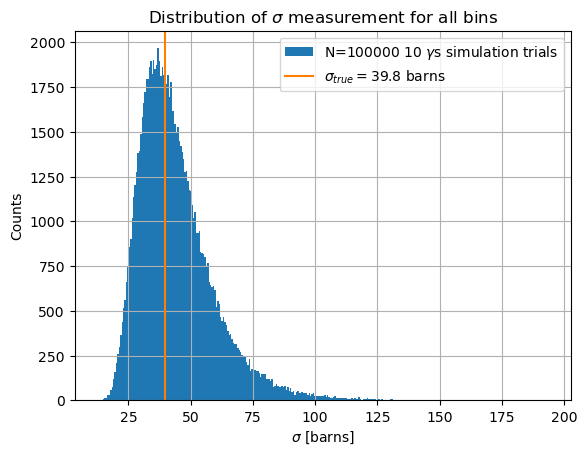

In [30]:
plt.hist(
    measured_cs*1e24,
    bins=int(np.floor(np.sqrt(len(measured_cs)))),
    label=r'N={} 10 $\gamma$s simulation trials'.format(number_of_MC)
    )
plt.grid()
plt.xlabel(r'$\sigma$ [barns]')
plt.ylabel('Counts')
plt.title(r'Distribution of $\sigma$ measurement for all bins')
plt.axvline(x=(1/(n_CsI*2.39))*1e24,color=colors[1],label=r'$\sigma_{true}=39.8$ barns')
plt.legend();

In [31]:
print((1/(n_CsI*2.39))*1e24)

39.84857541342897
